In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:
Data  = pd.read_csv("vibrations.csv")

In [3]:
Data.head()

,mm
0,-1.031900
1,0.651533
2,-0.581850
3,-0.538830
4,0.971045


In [4]:
Data.shape

(10000, 1)

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mm      10000 non-null  float64
dtypes: float64(1)
memory usage: 78.2 KB


{'whiskers': [<matplotlib.lines.Line2D at 0x7f10a89aac40>,
 'caps': [<matplotlib.lines.Line2D at 0x7f10a89451c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f10a89aa9a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f10a8945700>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f10a89459a0>],
 'means': []}

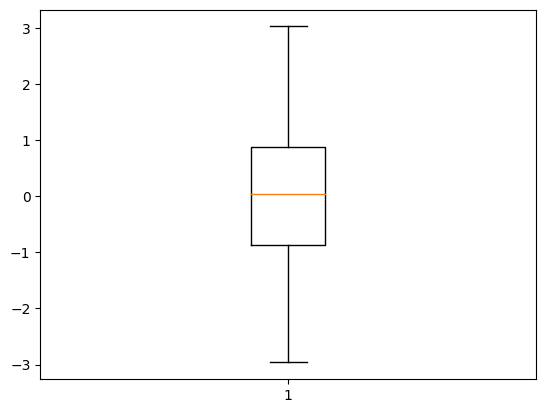

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.boxplot(Data)

In [7]:
#Data.sort_values(by=['mm'], inplace = True)

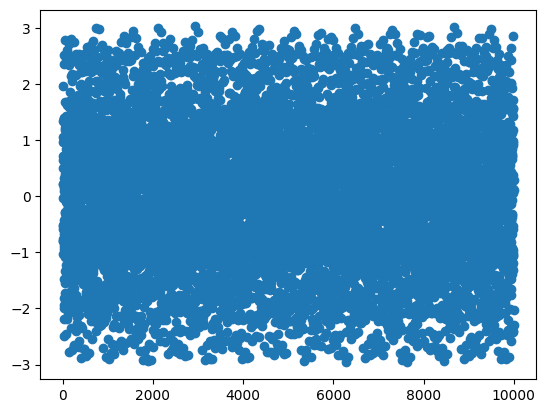

In [8]:
plt.scatter(Data.index,Data.mm)

<Axes: >

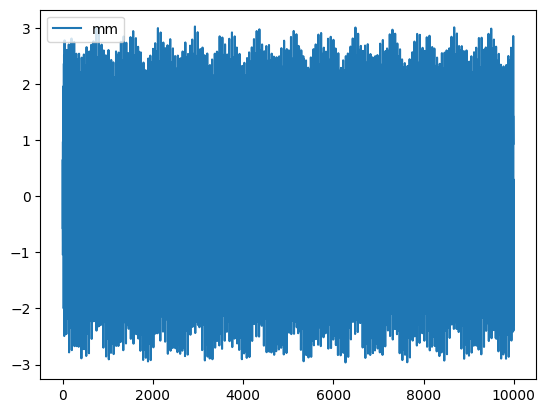

In [9]:
Data.plot(kind="line")

In [10]:
first1k = Data.iloc[0:1000,]

In [11]:
first1k

,mm
0,-1.031900
1,0.651533
2,-0.581850
3,-0.538830
4,0.971045
...,...
995,-0.446452
996,0.136968
997,-1.313510
998,0.114799


<Axes: >

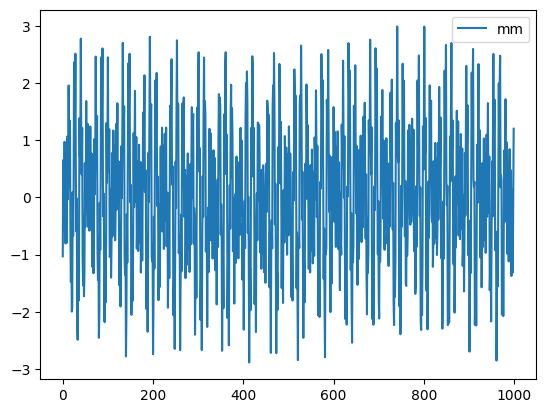

In [12]:
first1k.plot(kind="line")

In [13]:
fftop = np.fft.fftfreq(1000,first1k.mm)

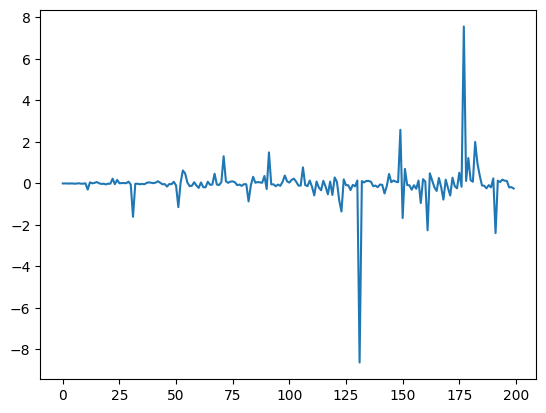

In [14]:
plt.plot(fftop[0:200])

In [15]:
def moving_average(a, n):
    return pd.Series(a).rolling(window=n, center=True).mean().to_numpy()

In [16]:
out_moving_avg_1k = moving_average(first1k.mm,10)

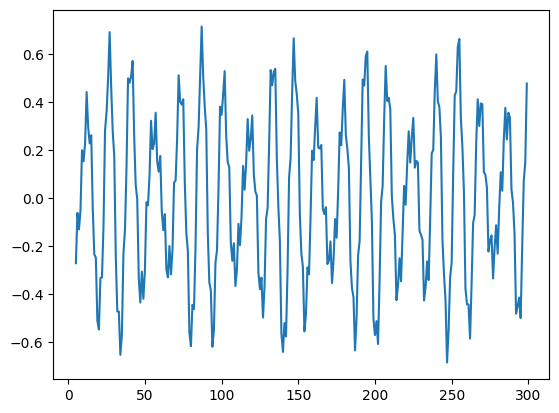

In [17]:
plt.plot(out_moving_avg_1k[0:300])

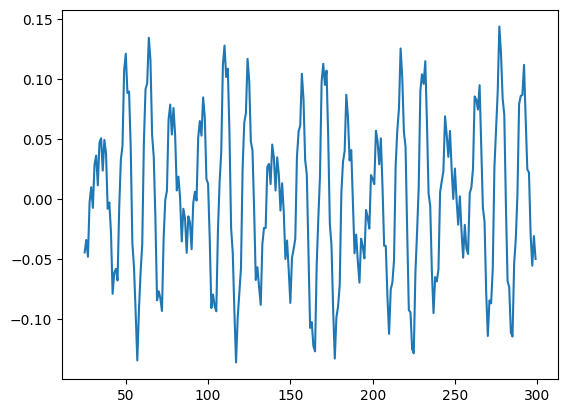

In [18]:
out_moving_avg_1k = moving_average(first1k.mm,50)
plt.plot(out_moving_avg_1k[0:300])

This shows low frequencies vibrations

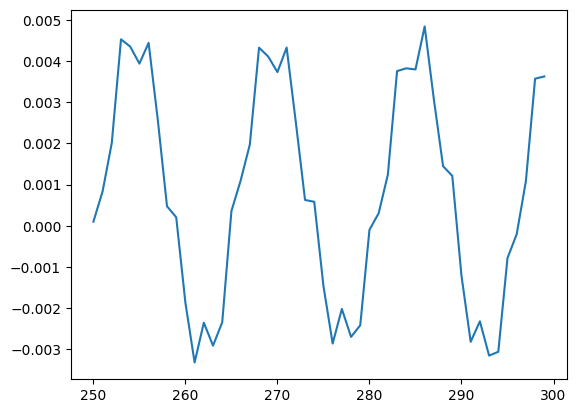

In [19]:
out_moving_avg_1k = moving_average(first1k.mm,500)
plt.plot(out_moving_avg_1k[0:300])

(array([12.,  6., 20., 26., 28., 26., 36., 48., 92., 63., 63., 54., 72.,
        81., 68., 53., 58., 56., 35., 31., 21., 12., 21., 13.,  5.]),
 array([-2.8881165 , -2.65306929, -2.41802207, -2.18297486, -1.94792764,
        -1.71288042, -1.47783321, -1.24278599, -1.00773878, -0.77269156,
        -0.53764434, -0.30259713, -0.06754991,  0.1674973 ,  0.40254452,
         0.63759173,  0.87263895,  1.10768617,  1.34273338,  1.5777806 ,
         1.81282781,  2.04787503,  2.28292225,  2.51796946,  2.75301668,
         2.98806389]),
 <BarContainer object of 25 artists>)

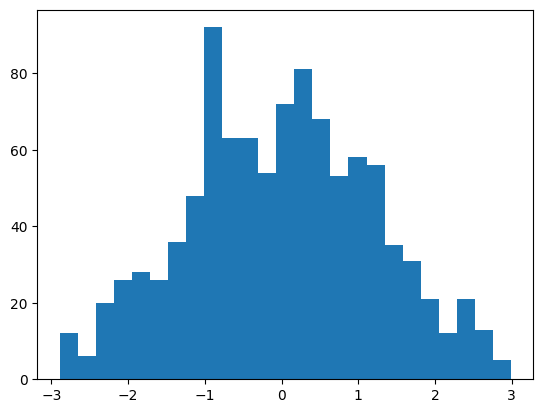

In [20]:
plt.hist(first1k,bins =25)

In [21]:
Data.describe()

,mm
count,10000.000000
mean,-0.000469
std,1.225200
min,-2.961817
25%,-0.872625
50%,0.040445
75%,0.876027
max,3.022369
